In [1]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
#그래프를 그릴 때 한글로 설정해줌 # 윈도우-Fonts
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) 

In [219]:
conn = connect_mysql()
query = 'select * from lol_datas'
df = pd.DataFrame(sql_execute_dict(conn,query))
conn.close()

In [220]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [5]:
tmp = df[['teamPosition','totalDamageDealtToChampions','totalDamageTaken','g_15']]

In [7]:
tmp = tmp[tmp.teamPosition != '']

In [8]:
tmp

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,TOP,26829,25034,7412
1,JUNGLE,26042,26732,6600
2,MIDDLE,17033,23842,5233
3,BOTTOM,29884,17827,8404
4,UTILITY,7470,18088,4614
...,...,...,...,...
10303,TOP,11270,28266,4663
10304,JUNGLE,10846,30488,6023
10305,MIDDLE,14583,15946,5698
10306,BOTTOM,14535,20360,5675


In [10]:
group_df = tmp.groupby('teamPosition').mean().round()

In [12]:
group_df.loc['BOTTOM']
group_df.iloc[0]


totalDamageDealtToChampions    21463.0
totalDamageTaken               19006.0
g_15                            5970.0
Name: BOTTOM, dtype: float64

Text(0.5, 1.0, '파이차트')

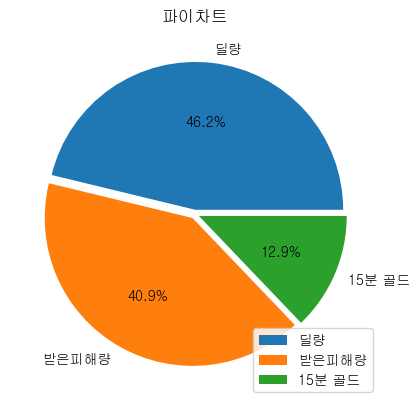

In [47]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['딜량','받은피해량','15분 골드'] ,shadow = False, autopct = '%1.1f%%',
       explode = (0.03,0.03,0.03))
plt.grid(True)
plt.legend(loc=4)
plt.title('파이차트')

In [42]:
my_tmp = tmp[['teamPosition','totalDamageDealtToChampions']]

In [48]:
my_tmp.set_index('teamPosition',inplace=True)

In [50]:
my_tmp

,totalDamageDealtToChampions
teamPosition,
TOP,26829
JUNGLE,26042
MIDDLE,17033
BOTTOM,29884
UTILITY,7470
...,...
TOP,11270
JUNGLE,10846
MIDDLE,14583


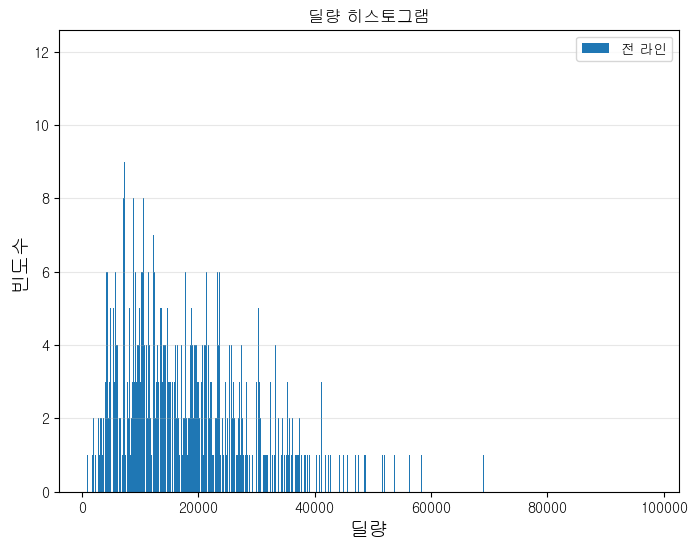

In [53]:
plt.figure(figsize = (8,6))
plt.hist(my_tmp, bins = len(my_tmp), label = '전 라인',rwidth = 0.9)

plt.xlabel('딜량', size = 14)
plt.ylabel('빈도수', size = 14)
plt.title('딜량 히스토그램')
plt.legend(loc = 'upper right')
plt.grid(axis = 'y', alpha = 0.3)

In [52]:
import seaborn as sns

In [54]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [55]:
df = get_df(url)

In [56]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [57]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM','HOLIDAY_PAY_NM','FULLTIME_MONTHLY','RATES','ADD_RATES']]

In [59]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

In [61]:
tmp = tmp.drop_duplicates()

In [63]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
965,태화관(구),1.0,유료,무료,유료,250000,500.0,1000.0
966,동일상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
974,숭인상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
980,필운대로 도미노피자앞 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


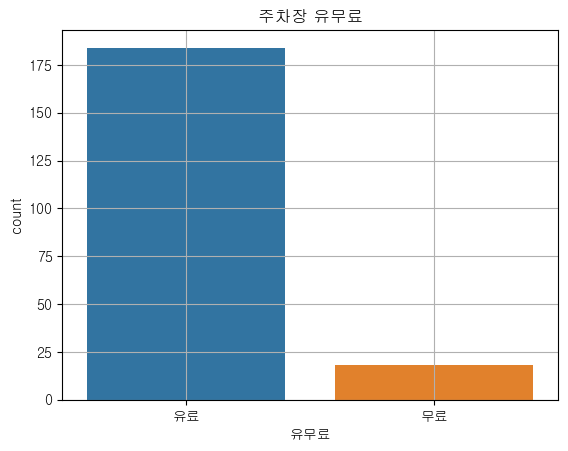

In [65]:
plt.figure()
plt.title('주차장 유무료')
sns.countplot(x='유무료',data=tmp,order=['유료','무료'])
plt.grid(True)

<Axes: title={'center': '기본요금 히스토그램'}, xlabel='기본요금', ylabel='Count'>

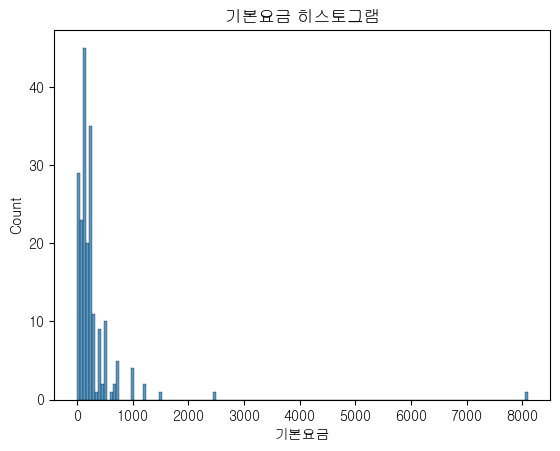

In [68]:
plt.figure()
plt.title('기본요금 히스토그램')
sns.histplot(x=tmp['기본요금'])

<Axes: xlabel='기본요금', ylabel='추가요금'>

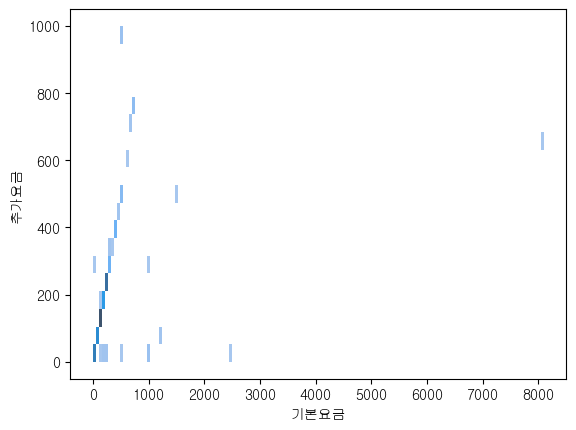

In [69]:
sns.histplot(x=tmp['기본요금'],y=tmp['추가요금'])

In [90]:
plt.figure()
sns.kdeplot(x=tmp['기본요금']) # kdeplot=분포도

KeyError: '기본요금'

<Figure size 640x480 with 0 Axes>

In [71]:
conn = connect_mysql()
query = 'select * from lol_datas'
lol_df = pd.DataFrame(sql_execute_dict(conn,query))

### 포지션중 하나 선택해서 15분 골드와 20분 골드를 kdeplot 으로 만들어서 보기

In [81]:
tmp = lol_df[['teamPosition','g_15','g_20']]

In [102]:
tmp.columns = ['포지션','15분골드','20분골드']

In [104]:
tmp

,포지션,15분골드,20분골드
0,TOP,7412,10439
1,TOP,6600,9488
2,TOP,5233,7161
3,TOP,8404,12488
4,TOP,4614,5909
...,...,...,...
10311,TOP,12750,0
10312,TOP,16180,0
10313,TOP,16150,0
10314,TOP,16495,0


C:\Users\NT950QDB-KC59S\AppData\Local\Temp\ipykernel_95340\2559460033.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['15분골드'],shade=True,color='black',label = '15분골드')
C:\Users\NT950QDB-KC59S\AppData\Local\Temp\ipykernel_95340\2559460033.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['20분골드'],shade=True,color='green',label = '20분골드')


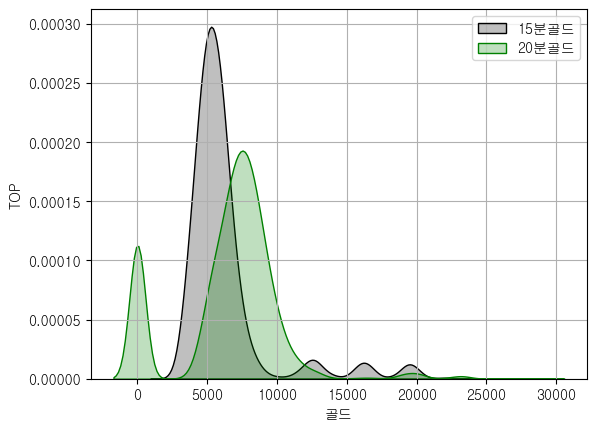

In [111]:
plt.figure()
plt.grid(True)
plt.xlabel('골드')
plt.ylabel('TOP')
sns.kdeplot(tmp['15분골드'],shade=True,color='black',label = '15분골드')
sns.kdeplot(tmp['20분골드'],shade=True,color='green',label = '20분골드')
plt.legend()

In [112]:
import seaborn as sns

In [113]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [114]:
df = get_df(url)

In [115]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [116]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM','HOLIDAY_PAY_NM','FULLTIME_MONTHLY','RATES','ADD_RATES']]

In [117]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

C:\Users\NT950QDB-KC59S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


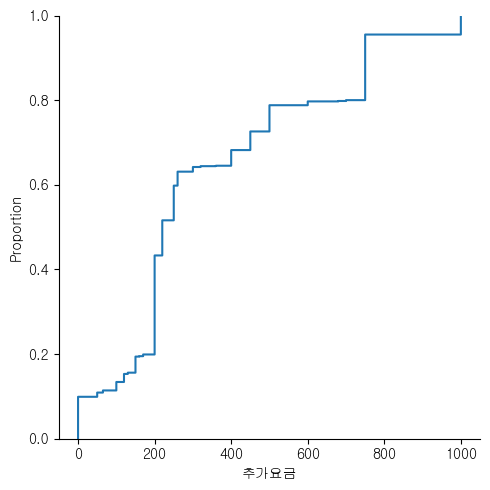

In [120]:
sns.displot(x=tmp['추가요금'],kind = 'ecdf')

<Axes: xlabel='기본요금', ylabel='Density'>

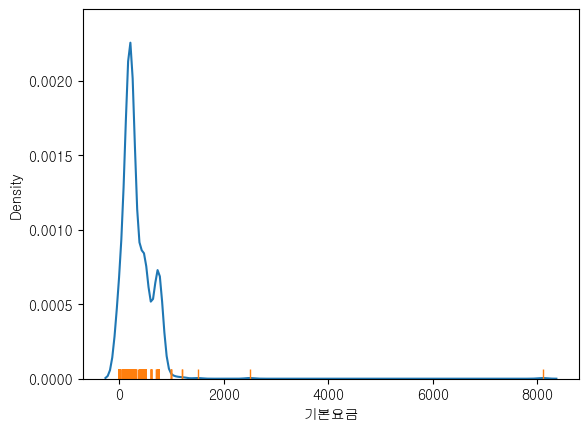

In [121]:
sns.kdeplot(x=tmp['기본요금'])
sns.rugplot(x=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

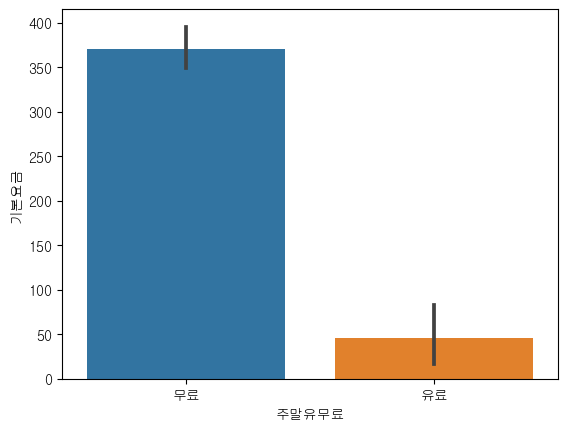

In [122]:
sns.barplot(x=tmp['주말유무료'],y=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='count'>

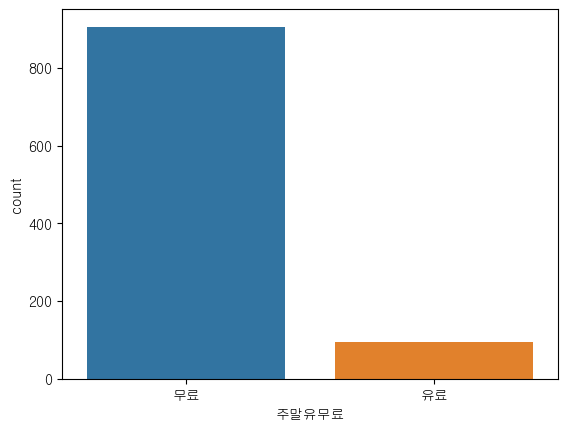

In [127]:
sns.countplot(x=tmp['주말유무료'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

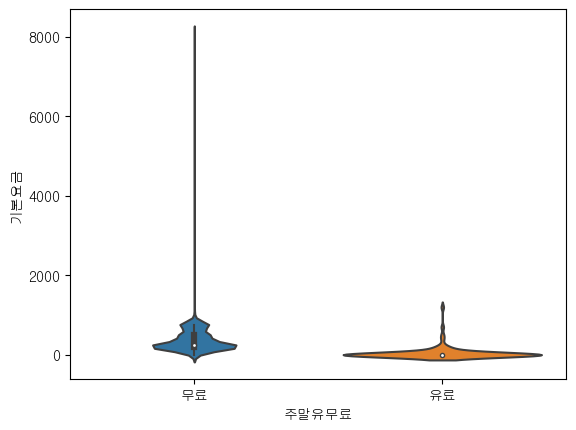

In [128]:
sns.violinplot(x=tmp['주말유무료'], y=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

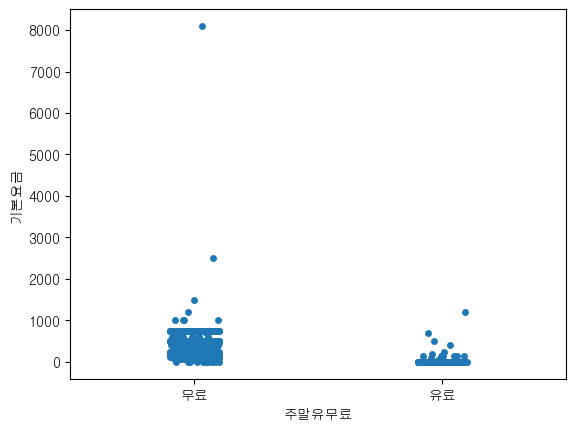

In [129]:
sns.stripplot(x=tmp['주말유무료'],y=tmp['기본요금'])

In [131]:
tmp.columns

Index(['주차장명', '주차수', '유무료', '주말유무료', '공휴일유무료', '월정기권금액', '기본요금', '추가요금'], dtype='object')

In [132]:
tmp.set_index('주차장명',inplace = True)

In [133]:
test = tmp[['주차수','기본요금','추가요금']]

In [135]:
test.corr()

,주차수,기본요금,추가요금
주차수,1.000000,0.002591,-0.167698
기본요금,0.002591,1.000000,0.607381
추가요금,-0.167698,0.607381,1.000000


<Axes: >

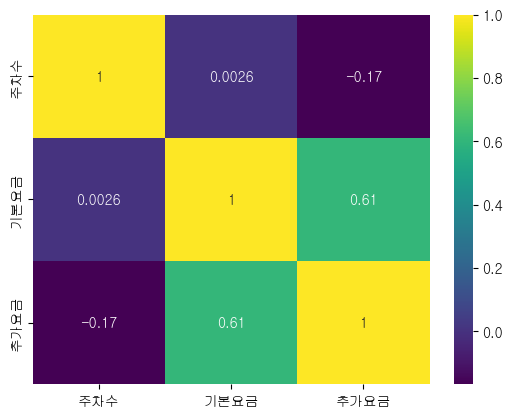

In [138]:
sns.heatmap(test.corr(),annot = True, cmap='viridis')

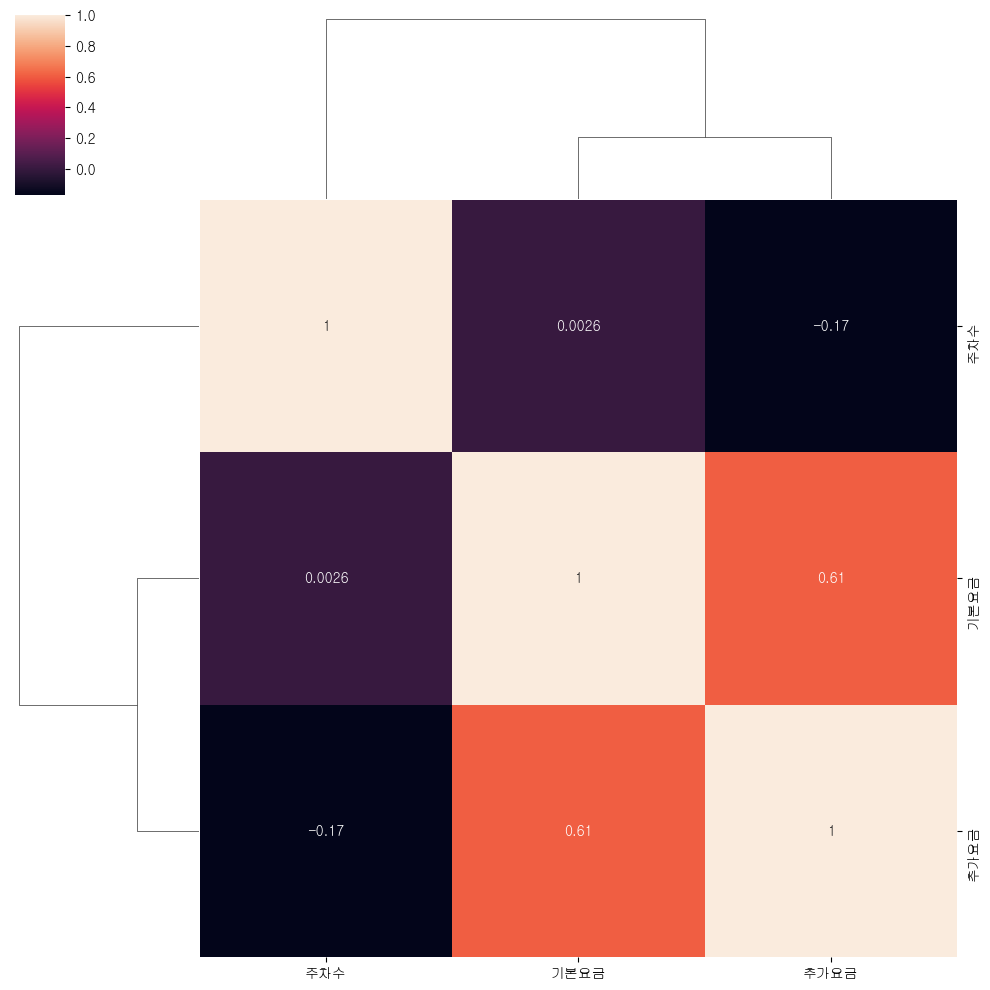

In [140]:
sns.clustermap(test.corr(),annot =True)

C:\Users\NT950QDB-KC59S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


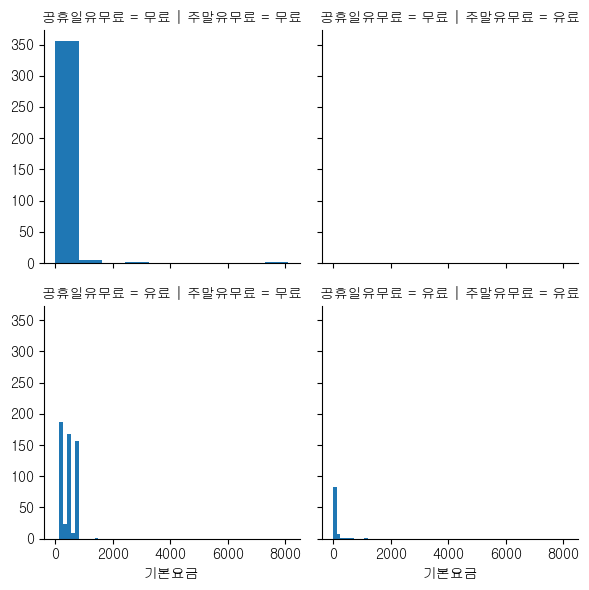

In [143]:
sns.FacetGrid(tmp,col = '주말유무료',row = '공휴일유무료').map(plt.hist,'기본요금')

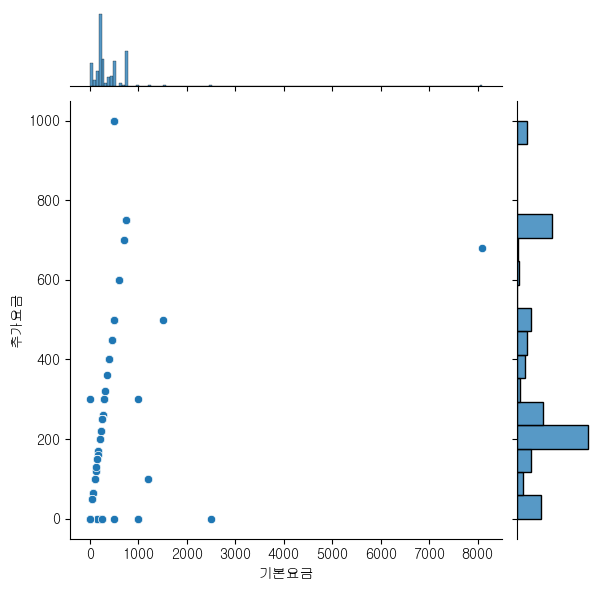

In [144]:
sns.jointplot(x=tmp['기본요금'],y=tmp['추가요금'],kind = 'scatter')

<Axes: xlabel='기본요금', ylabel='추가요금'>

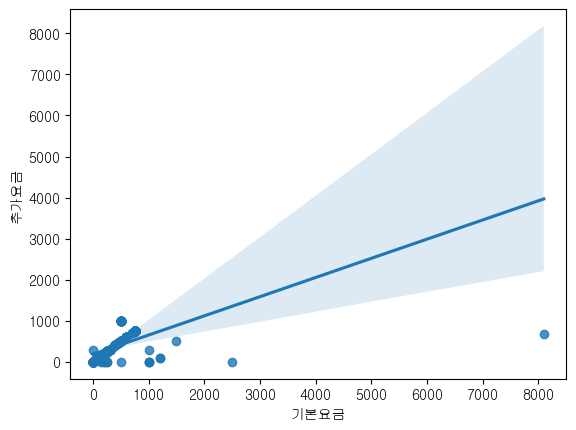

In [145]:
sns.regplot(x='기본요금',y='추가요금',data=tmp)

C:\Users\NT950QDB-KC59S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


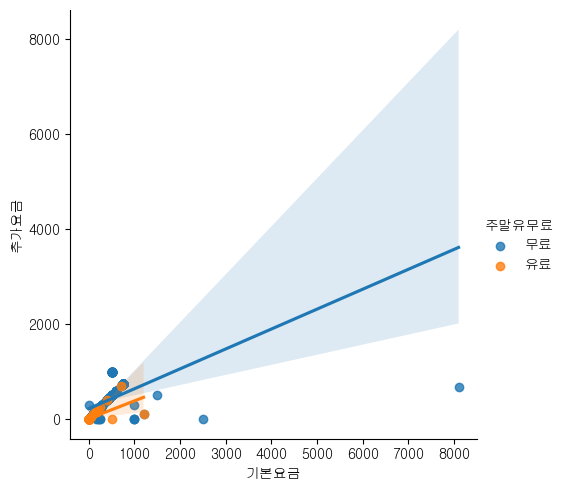

In [147]:
sns.lmplot(x='기본요금',y='추가요금',data=tmp,hue='주말유무료')

C:\Users\NT950QDB-KC59S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


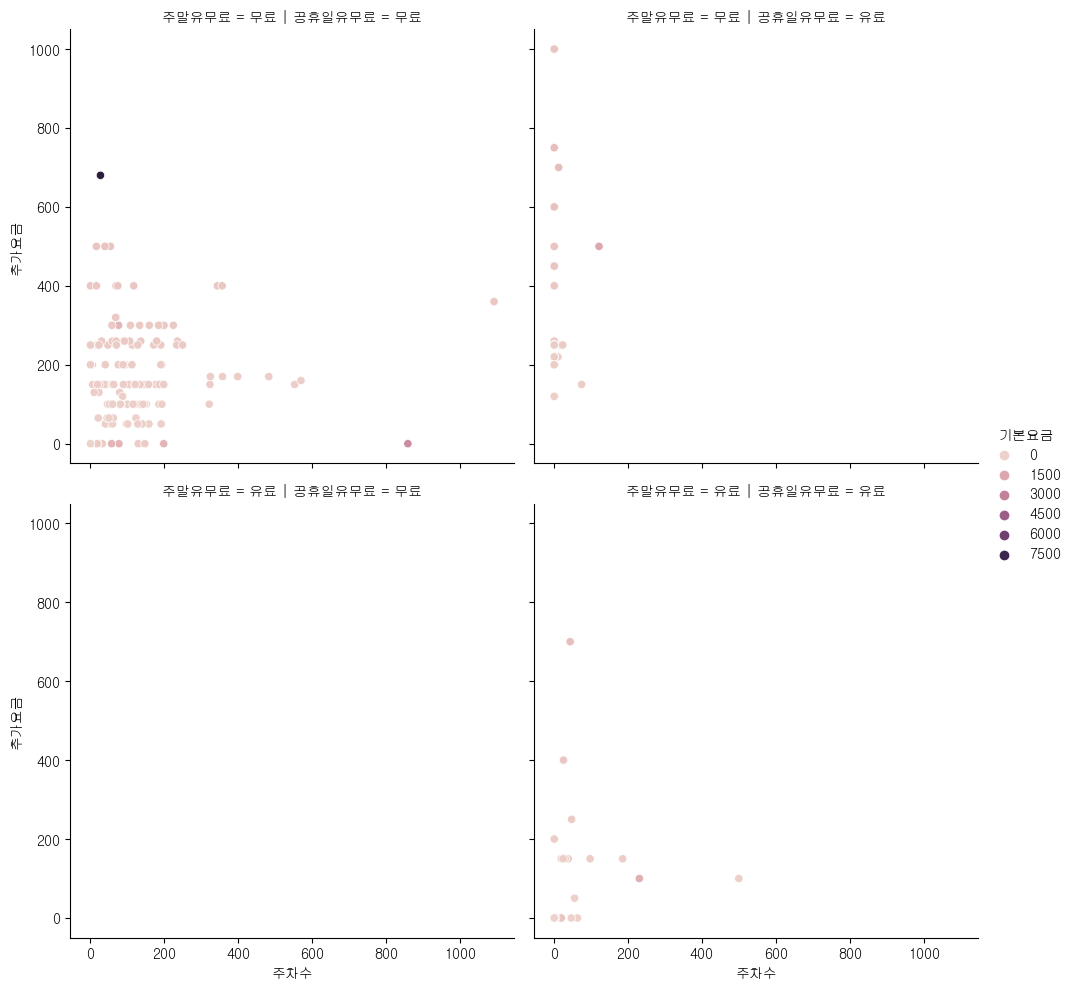

In [148]:
sns.relplot(x='주차수',y='추가요금',hue ='기본요금',row = '주말유무료',col='공휴일유무료',data=tmp)

In [149]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [150]:
url = "https://api.upbit.com/v1/candles/days"
coin_lst = ['KRW-BTC','KRW-ETH','KRW-XRP']
headers = {"Accept": "application/json"}
df = pd.DataFrame()
for c in coin_lst:
    querystring = {"market":c, "count":"200"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    df = pd.concat([df,pd.DataFrame(response.json())])

In [152]:
df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2023-12-28T00:00:00,2023-12-28T09:00:00,57920000.0,58468000.0,57474000.0,57720000.0,1703736768522,5.539208e+10,9.572900e+02,57920000.0,-200000.0,-0.003453
1,KRW-BTC,2023-12-27T00:00:00,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3.965843e+03,57032000.0,888000.0,0.015570
2,KRW-BTC,2023-12-26T00:00:00,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,1703635199803,2.708228e+11,4.735230e+03,58042000.0,-1010000.0,-0.017401
3,KRW-BTC,2023-12-25T00:00:00,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,1703548799890,2.721330e+11,4.687209e+03,58002000.0,40000.0,0.000690
4,KRW-BTC,2023-12-24T00:00:00,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,1703462399990,2.200170e+11,3.729334e+03,59250000.0,-1248000.0,-0.021063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T00:00:00,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1686959997094,1.610391e+11,2.616515e+08,627.0,-3.0,-0.004785
196,KRW-XRP,2023-06-15T00:00:00,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1686873599460,1.663204e+11,2.660830e+08,631.0,-4.0,-0.006339
197,KRW-XRP,2023-06-14T00:00:00,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,1686787200001,2.592919e+11,3.998507e+08,679.0,-48.0,-0.070692
198,KRW-XRP,2023-06-13T00:00:00,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,1686700799794,4.851964e+11,6.910409e+08,689.0,-10.0,-0.014514


In [160]:
my_df = df[['market','candle_date_time_kst','opening_price','high_price',
            'low_price','trade_price','candle_acc_trade_price','candle_acc_trade_volume']].copy()
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,KRW-BTC,2023-12-28T09:00:00,57920000.0,58468000.0,57474000.0,57720000.0,5.539208e+10,9.572900e+02
1,KRW-BTC,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
2,KRW-BTC,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
3,KRW-BTC,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
4,KRW-BTC,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03
...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
196,KRW-XRP,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
197,KRW-XRP,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08
198,KRW-XRP,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08


In [161]:
my_df['market'] = my_df['market'].str.replace('KRW-','')

In [163]:
my_df['candle_date_time_kst'] = my_df['candle_date_time_kst'].str.replace('T09:00:00','')

In [164]:
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,BTC,2023-12-28,57920000.0,58468000.0,57474000.0,57720000.0,5.539208e+10,9.572900e+02
1,BTC,2023-12-27,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
2,BTC,2023-12-26,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
3,BTC,2023-12-25,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
4,BTC,2023-12-24,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03
...,...,...,...,...,...,...,...,...
195,XRP,2023-06-16,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
196,XRP,2023-06-15,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
197,XRP,2023-06-14,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08
198,XRP,2023-06-13,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08


In [195]:
import plotly.express as px
import numpy as np


In [166]:
plotly.offline.iplot({
    "data" : [go.Scatter(x=[1,2,3,4], y=[4,3,2,1])],
    "layout": go.Layout(title = 'Siuuuuu')
})

In [167]:
fig = px.scatter(my_df[my_df.market=='BTC'],
                x = 'candle_date_time_kst',
                y = 'trade_price')
plotly.offline.iplot(fig)
# = fig.show()

In [172]:
fig = px.bar(my_df[my_df.market=='BTC'][-10:],
                x = 'candle_date_time_kst',
                y = 'trade_price')
fig.show()

In [175]:
fig = px.line(my_df[my_df.market=='XRP'],
                x = 'candle_date_time_kst',
                y = 'trade_price')
fig.show()

In [204]:
tmp_df = lol_df[['championName','totalDamageDealtToChampions','totalDamageTaken']]

In [208]:
new_df = tmp_df.groupby('championName').mean().round().reset_index()

In [209]:
new_df

,championName,totalDamageDealtToChampions,totalDamageTaken
0,Aatrox,20850.0,32869.0
1,Ahri,19321.0,20485.0
2,Akali,22562.0,25916.0
3,Akshan,22504.0,19189.0
4,Alistar,10372.0,28175.0
...,...,...,...
161,Zeri,26561.0,22083.0
162,Ziggs,26949.0,16348.0
163,Zilean,10756.0,18465.0
164,Zoe,18280.0,16166.0


In [210]:
fig = px.scatter(new_df,
                x = 'totalDamageDealtToChampions',
                y = 'totalDamageTaken',
                color = 'championName')
fig.show()

In [276]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [254]:
# - blue팀 정글포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONID -> j_champ) (테이블 이름 - blue_jungle)
# - blue팀 탑포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONID -> t_champ) (테이블 이름 - blue_top)
# - blue팀끼리 merge 

# - red 동일하게 정글, 탑 뽑아내서 merge


# - blue팀과 red팀의 데이터를 merge하기 위해서 enemy_blue / enemy_red 라는 데이터프레임 제작 
# - 이후 championName들을 rename을 통해 각각 enemy_j_champ_cham enemy_t_champ으로 변환


# - blue팀입장에서 red팀의 데이터 merge
# - red 팀 입장에서 blue팀 데이터 merge

# - 위에서 만들어진 merge테이블을 concat을 이용해서 하나의 데이터 테이블로 만들기
# - games와 win의 횟수를 구하고 win_rate(승률) 컬럼을 추가한 result 테이블 

In [347]:
blue_team = df[df['teamId'] == 100]
red_team = df[df['teamId'] == 200]

In [348]:
lol_df1 = blue_team[['gameId','teamPosition','championName','win']]
lol_df2 = red_team[['gameId','teamPosition','championName','win']]

In [349]:
blue_jungle = lol_df1.loc[lol_df1['teamPosition'] == 'JUNGLE']
blue_top = lol_df1.loc[lol_df1['teamPosition'] == 'TOP']

In [350]:
red_jungle = lol_df2.loc[lol_df2['teamPosition'] == 'JUNGLE']
red_top = lol_df2.loc[lol_df2['teamPosition'] == 'TOP']

In [351]:
blue_merge = pd.merge(blue_jungle,blue_top,on=('gameId','win'))
red_merge = pd.merge(red_jungle,red_top,on=('gameId','win'))

In [352]:
all_merge = pd.merge(blue_merge,red_merge, on=('gameId'))
all_merge2 = pd.merge(red_merge,blue_merge, on=('gameId'))

In [354]:
all_merge.columns = ['gameId','b_j','j_champ','win','b_t','t_champ','r_j','enemy_j_champ','r_w','r_t','enemy_t_champ']
all_merge2.columns = ['gameId','r_j','j_champ','win','r_t','t_champ','b_j','enemy_j_champ','b_w','b_t','enemy_t_champ']

In [355]:
data = all_merge[['j_champ','t_champ','enemy_j_champ','enemy_t_champ','win']]

In [356]:
data

,j_champ,t_champ,enemy_j_champ,enemy_t_champ,win
0,Shyvana,Renekton,Kayn,Irelia,True
1,Shyvana,Quinn,Khazix,Trundle,True
2,Graves,Poppy,Elise,Kled,False
3,Vi,Darius,LeeSin,Pantheon,False
4,Poppy,Kayle,Shaco,Yone,True
...,...,...,...,...,...
945,LeeSin,Akali,Hecarim,Nocturne,True
946,Khazix,Jayce,Belveth,Tryndamere,False
947,Vi,Aatrox,Elise,Jayce,True
948,LeeSin,Aatrox,Nocturne,Olaf,True


In [373]:
data['win']=data.apply(lambda x:1 if x.win == 'True' else 0,axis=1)

C:\Users\NT950QDB-KC59S\AppData\Local\Temp\ipykernel_95340\177587854.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [381]:
games = data[['j_champ','t_champ','enemy_j_champ','enemy_t_champ','win']].groupby(['j_champ','t_champ','enemy_j_champ','enemy_t_champ']).count().rename(columns={'win':'cnt'})

In [382]:
games = games.sort_values('cnt',ascending = False)

In [383]:
games

cnt
j_champ  t_champ      enemy_j_champ enemy_t_champ     
Amumu    Aatrox       Graves        Trundle          1
Nocturne Jax          Taliyah       Malphite         1
         Darius       Graves        Trundle          1
         FiddleSticks Graves        Trundle          1
         Fiora        Graves        Jax              1
...                                                ...
JarvanIV Yone         LeeSin        KSante           1
                      Vi            Renekton         1
Jax      Ashe         Nidalee       Aatrox           1
         Darius       FiddleSticks  Aatrox           1
Zyra     KSante       Gragas        Olaf             1

[950 rows x 1 columns]